#### Import Packages

In [2]:
import zipfile
import pandas as pd
import os

#### Unzip the file

In [5]:
## Extract all contents from zip file
with zipfile.ZipFile('../archive.zip', 'r') as myzip:
    myzip.extractall()

In [6]:
current_dir = os.getcwd()
files = os.listdir(current_dir) # list all files in the directory

In [9]:
filepath = []
# Check for a csv file in the zip folder
for file in files:
    if file.endswith('.csv'):
        filepath.append(file)

In [11]:
filepath

['online-job-postings.csv']

In [13]:
df = pd.read_csv(filepath[0])
df.head()

,jobpost,date,Title,Company,AnnouncementCode,Term,Eligibility,Audience,StartDate,Duration,...,Salary,ApplicationP,OpeningDate,Deadline,Notes,AboutC,Attach,Year,Month,IT
0,AMERIA Investment Consulting Company\r\nJOB TI...,"Jan 5, 2004",Chief Financial Officer,AMERIA Investment Consulting Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"To apply for this position, please submit a\r\...",NaN,26 January 2004,NaN,NaN,NaN,2004,1,False
1,International Research & Exchanges Board (IREX...,"Jan 7, 2004",Full-time Community Connections Intern (paid i...,International Research & Exchanges Board (IREX),NaN,NaN,NaN,NaN,NaN,3 months,...,NaN,Please submit a cover letter and resume to:\r\...,NaN,12 January 2004,NaN,The International Research & Exchanges Board (...,NaN,2004,1,False
2,Caucasus Environmental NGO Network (CENN)\r\nJ...,"Jan 7, 2004",Country Coordinator,Caucasus Environmental NGO Network (CENN),NaN,NaN,NaN,NaN,NaN,Renewable annual contract\r\nPOSITION,...,NaN,Please send resume or CV toursula.kazarian@......,NaN,20 January 2004\r\nSTART DATE: February 2004,NaN,The Caucasus Environmental NGO Network is a\r\...,NaN,2004,1,False
3,Manoff Group\r\nJOB TITLE: BCC Specialist\r\n...,"Jan 7, 2004",BCC Specialist,Manoff Group,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Please send cover letter and resume to Amy\r\n...,NaN,23 January 2004\r\nSTART DATE: Immediate,NaN,NaN,NaN,2004,1,False
4,Yerevan Brandy Company\r\nJOB TITLE: Software...,"Jan 10, 2004",Software Developer,Yerevan Brandy Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Successful candidates should submit\r\n- CV; \...,NaN,"20 January 2004, 18:00",NaN,NaN,NaN,2004,1,True


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19001 entries, 0 to 19000
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   jobpost           19001 non-null  object
 1   date              19001 non-null  object
 2   Title             18973 non-null  object
 3   Company           18994 non-null  object
 4   AnnouncementCode  1208 non-null   object
 5   Term              7676 non-null   object
 6   Eligibility       4930 non-null   object
 7   Audience          640 non-null    object
 8   StartDate         9675 non-null   object
 9   Duration          10798 non-null  object
 10  Location          18969 non-null  object
 11  JobDescription    15109 non-null  object
 12  JobRequirment     16479 non-null  object
 13  RequiredQual      18517 non-null  object
 14  Salary            9622 non-null   object
 15  ApplicationP      18941 non-null  object
 16  OpeningDate       18295 non-null  object
 17  Deadline    

##### 1. Missing values (NaN)

##### 2. StartDate inconsistencies (ASAP)
##### 3. Fix nondescriptive column headers (ApplicationP, AboutC, RequiredQual ... and also JobRequirment)
### Clean
#### Define
##### 1. Select all nondescriptive and misspelled column headers (ApplicationP, AboutC, RequiredQual, JobRequirment) and replace them with full words (ApplicationProcedure, AboutCompany, RequiredQualifications, JobRequirement)
##### 2. Select all records in the StartDate column that have "As soon as possible", "Immediately", etc. and replace the text in those cells with "ASAP"

In [18]:
df.Year.value_counts()

Year
2012    2149
2013    2009
2015    2009
2014    1983
2008    1785
2011    1697
2007    1538
2010    1511
2009    1191
2005    1138
2006    1116
2004     875
Name: count, dtype: int64

In [20]:
df.StartDate.value_counts()

StartDate
ASAP                              4754
Immediately                        773
As soon as possible                543
Upon hiring                        261
Immediate                          259
                                  ... 
Flexible                             1
11 April 2010                        1
ASAP starting 10 February 2006       1
07 April 2010                        1
15 March 2009                        1
Name: count, Length: 1186, dtype: int64

#### Non-descriptive Column Headers

In [23]:
df_clean = df.copy()

#### Rename column header

In [26]:
df_clean.columns

Index(['jobpost', 'date', 'Title', 'Company', 'AnnouncementCode', 'Term',
       'Eligibility', 'Audience', 'StartDate', 'Duration', 'Location',
       'JobDescription', 'JobRequirment', 'RequiredQual', 'Salary',
       'ApplicationP', 'OpeningDate', 'Deadline', 'Notes', 'AboutC', 'Attach',
       'Year', 'Month', 'IT'],
      dtype='object')

In [28]:
df_clean = df_clean.rename(columns={'ApplicationP': 'ApplicationProcedure',
                                    'AboutC': 'AboutCompany',
                                    'RequiredQual': 'RequiredQualifications',
                                    'JobRequirment': 'JobRequirements'
                                   }
                          )

#### Fixing Inconsistencies in Data

In [31]:
asap_list = ['Immediately', 'As soon as possible', 'Upon hiring',
             'Immediate', 'Immediate employment', 'As soon as possible.', 'Immediate job opportunity',
             '"Immediate employment, after passing the interview."',
             'ASAP preferred', 'Employment contract signature date',
             'Immediate employment opportunity', 'Immidiately', 'ASA',
             'Asap', '"The position is open immediately but has a flexible start date depending on the candidates earliest availability."',
             'Immediately upon agreement', '20 November 2014 or ASAP',
             'immediately', 'Immediatelly',
             '"Immediately upon selection or no later than November 15, 2009."',
             'Immediate job opening', 'Immediate hiring', 'Upon selection',
             'As soon as practical', 'Immadiate', 'As soon as posible',
             'Immediately with 2 months probation period',
             '12 November 2012 or ASAP', 'Immediate employment after passing the interview',
             'Immediately/ upon agreement', '01 September 2014 or ASAP',
             'Immediately or as per agreement', 'as soon as possible',
             'As soon as Possible', 'in the nearest future', 'immediate',
             '01 April 2014 or ASAP', 'Immidiatly', 'Urgent',
             'Immediate or earliest possible', 'Immediate hire',
             'Earliest  possible', 'ASAP with 3 months probation period.',
             'Immediate employment opportunity.', 'Immediate employment.',
             'Immidietly', 'Imminent', 'September 2014 or ASAP', 'Imediately']

In [33]:
df_clean.StartDate.value_counts()

StartDate
ASAP                              4754
Immediately                        773
As soon as possible                543
Upon hiring                        261
Immediate                          259
                                  ... 
Flexible                             1
11 April 2010                        1
ASAP starting 10 February 2006       1
07 April 2010                        1
15 March 2009                        1
Name: count, Length: 1186, dtype: int64

In [35]:
# Using for loop 
for item in asap_list:
    df_clean['StartDate'] = df_clean['StartDate'].replace(item, 'ASAP')

In [37]:
df_clean.StartDate.value_counts()

StartDate
ASAP                 6856
01 September 2012      31
March 2006             27
November 2006          22
January 2010           19
                     ... 
Flexible                1
11 April 2010           1
3-21 July 2006          1
07 April 2010           1
25 March 2009           1
Name: count, Length: 1140, dtype: int64

#### Testing

In [40]:
df_clean.columns

Index(['jobpost', 'date', 'Title', 'Company', 'AnnouncementCode', 'Term',
       'Eligibility', 'Audience', 'StartDate', 'Duration', 'Location',
       'JobDescription', 'JobRequirements', 'RequiredQualifications', 'Salary',
       'ApplicationProcedure', 'OpeningDate', 'Deadline', 'Notes',
       'AboutCompany', 'Attach', 'Year', 'Month', 'IT'],
      dtype='object')

#### Assert Statements
Assert statements are a debugging tool in Python. It starts with assert followed by a logical statement that evaluates to TRUE or FALSE.

In [43]:
assert 2 + 2 == 5

AssertionError: 

In [ ]:
print('Enter marks out of 100:')
num = 125
assert num >= 0 and num <= 100
print('Marks obtained:', num)

In [46]:
# assert statement to verify that none of the phrases similar to 'ASAP' remain in the StartDate column
for phrase in asap_list:
    assert phrase not in df_clean.StartDate.values

In [48]:
for phrase in asap_list:
    assert phrase not in df.StartDate.values

AssertionError: 

#### Analysis & Visualisation

<Axes: ylabel='count'>

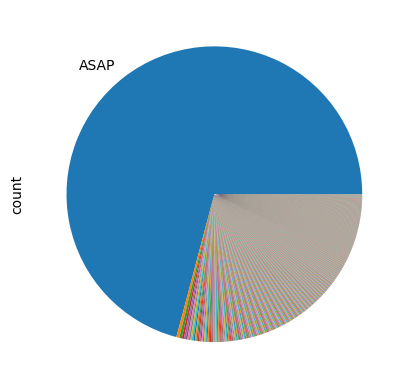

In [51]:
%matplotlib inline
import numpy as np
labels = np.full(len(df_clean.StartDate.value_counts()), "", dtype=object)
labels[0] = 'ASAP'
df_clean.StartDate.value_counts().plot(kind="pie", labels=labels)

<Axes: ylabel='count'>

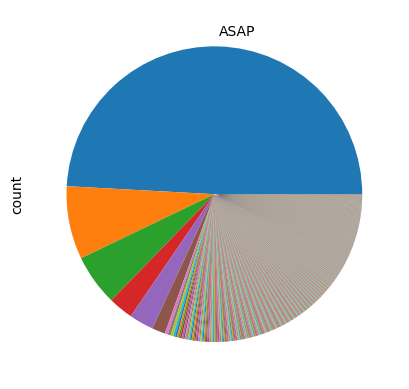

In [52]:
%matplotlib inline
import numpy as np
labels = np.full(len(df.StartDate.value_counts()), "", dtype=object)
labels[0] = 'ASAP'
df.StartDate.value_counts().plot(kind="pie", labels=labels)

#### Reading a TSV file

In [56]:
df_ = pd.read_csv('../bestofrt.tsv', sep='\t')
df_.head()

,ranking,critic_score,title,number_of_critic_ratings
0,1,99,The Wizard of Oz (1939),110
1,2,100,Citizen Kane (1941),75
2,3,100,The Third Man (1949),77
3,4,99,Get Out (2017),282
4,5,97,Mad Max: Fury Road (2015),370


#### Gathering Data from a Website.

In [ ]:
### The first approach is to download and save the webpage into the working directory

In [62]:
import requests
url = 'https://www.rottentomatoes.com/m/et_the_extraterrestrial'
response = requests.get(url)

In [64]:
# Save HTML to file
with open("et_the_extraterrestrial.html", mode='wb') as file:
    file.write(response.content)

#### Webscraping using Beautiful Soup

In [ ]:
from bs4 import BeautifulSoup
import os
import pandas as pd

In [129]:
# List of dictionaries to build file by file and later convert to a DataFrame
df_list = []
folder = '../rt_html'
for movie_html in os.listdir(folder):
    with open(os.path.join(folder, movie_html)) as file:
        # Your code here
        # Note: a correct implementation may take ~15 seconds to run
        title = soup.find('title').contents[0][:-len(' - Rotten Tomatoes')]
        audience_score = soup.find('div', class_='audience-score meter').find('span').contents[0][:-1]
        num_audience_ratings = soup.find('div', class_='audience-info hidden-xs superPageFontColor')
        num_audience_ratings = num_audience_ratings.find_all('div')[1].contents[2].strip().replace(
        
        
        # Append to list of dictionaries
        df_list.append({'title': title,
                        'audience_score': int(audience_score),
                        'number_of_audience_ratings': int(num_audience_ratings)})
df = pd.DataFrame(df_list, columns = ['title', 'audience_score', 'number_of_audience_ratings'])
df

SyntaxError: '(' was never closed (534073401.py, line 11)

In [ ]:
df_solution = pd.read_pickle('df_solution.pkl')
df.sort_values('title', inplace = True)
df.reset_index(inplace = True, drop = True)
df_solution.sort_values('title', inplace = True)
df_solution.reset_index(inplace = True, drop = True)
pd.testing.assert_frame_equal(df, df_solution)

In [113]:
# This method does not download but work with  HTML in memory
import requests
from bs4 import BeautifulSoup
url = 'https://www.rottentomatoes.com/m/et_the_extraterrestrial'
response = requests.get(url)
soup = BeautifulSoup(response.content, 'lxml')

In [105]:
soup.prettify()

'<!DOCTYPE html>\n<html dir="ltr" lang="en" prefix="fb: http://www.facebook.com/2008/fbml og: http://opengraphprotocol.org/schema/" xmlns="http://www.w3.org/1999/xhtml">\n <head prefix="og: http://ogp.me/ns# flixstertomatoes: http://ogp.me/ns/apps/flixstertomatoes#">\n  <script charset="UTF-8" crossorigin="anonymous" data-domain-script="7e979733-6841-4fce-9182-515fac69187f" integrity="sha384-TKdmlzVmoD70HzftTw4WtOzIBL5mNx8mXSRzEvwrWjpIJ7FZ/EuX758yMDWXtRUN" src="https://cdn.cookielaw.org/consent/7e979733-6841-4fce-9182-515fac69187f/otSDKStub.js" type="text/javascript">\n  </script>\n  <script type="text/javascript">\n   function OptanonWrapper() { }\n  </script>\n  <script ccpa-opt-out-geo="US" ccpa-opt-out-ids="USP" ccpa-opt-out-lspa="false" charset="UTF-8" src="https://cdn.cookielaw.org/opt-out/otCCPAiab.js" type="text/javascript">\n  </script>\n  <script src="/assets/pizza-pie/javascripts/bundles/roma/rt-common.js?single">\n  </script>\n  <meta content="text/html; charset=utf-8" http

None


None


In [119]:
soup.find('title').contents[0][:-len(' - Rotten Tomatoes')]

'E.T. the Extra-Terrestrial'

In [123]:
soup.find('div', class_='audience-score meter').contents[0][:-1]

AttributeError: 'NoneType' object has no attribute 'contents'

In [73]:
import pandas as pd
df_critic_score = pd.read_csv("../bestofrt.tsv" ,sep='\t')
df_critic_score.head()

,ranking,critic_score,title,number_of_critic_ratings
0,1,99,The Wizard of Oz (1939),110
1,2,100,Citizen Kane (1941),75
2,3,100,The Third Man (1949),77
3,4,99,Get Out (2017),282
4,5,97,Mad Max: Fury Road (2015),370


In [ ]:
df_critic_score = pd.read_csv("../bestofrt.tsv" ,sep='\t')

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(df.audience_score, df.critic_score)